In [1]:
import numpy as np
import pandas as pd
from rulevetting.projects.tbi_pecarn.dataset import Dataset
from rulevetting.projects.tbi_pecarn.dataset import AgeSplit
from sklearn import metrics
pd.set_option("display.max_colwidth",1000)

/usr/local/lib/python3.9/site-packages/redis/connection.py:77: UserWarning: redis-py works best with hiredis. Please consider installing
  warnings.warn(msg)


# Read data

In [8]:
df_train_old, df_tune_old, df_test_old = Dataset().get_data(split_age=AgeSplit.OLD,load_csvs=False)
df_train_old = df_train_old.drop(columns=['AgeinYears','Race','Gender'])
df_tune_old = df_tune_old.drop(columns=['AgeinYears','Race','Gender'])
X_train_old = df_train_old.drop(columns="outcome")
y_train_old = df_train_old["outcome"].values
X_tune_old = df_tune_old.drop(columns="outcome")
y_tune_old = df_tune_old["outcome"].values

df_train_young, df_tune_young, df_test_young = Dataset().get_data(split_age=AgeSplit.YOUNG,load_csvs=False)
df_train_young = df_train_young.drop(columns=['AgeinYears','Race','Gender'])
df_tune_young = df_tune_young.drop(columns=['AgeinYears','Race','Gender'])
X_train_young = df_train_young.drop(columns="outcome")
y_train_young = df_train_young["outcome"].values
X_tune_young = df_tune_young.drop(columns="outcome")
y_tune_young = df_tune_young["outcome"].values

df_train_all, df_tune_all, df_test_all = Dataset().get_data(split_age=AgeSplit.AGEINVARIANT,load_csvs=False)
df_train_all = df_train_all.drop(columns=['AgeinYears','Race','Gender'])
df_tune_all = df_tune_all.drop(columns=['AgeinYears','Race','Gender'])
X_train_all = df_train_all.drop(columns="outcome")
y_train_all = df_train_all["outcome"].values
X_tune_all = df_tune_all.drop(columns="outcome")
y_tune_all = df_tune_all["outcome"].values

kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step7_AMS': 3, 'step8_OSI': 3, 'step9_HEMA': 3, 'step10_SFx': 2, 'step11_SFxBas': 3, 'step12_Clav': 3, 'step13_NeuroD': 3, 'step14_Vomit': 1, 'step15_HA': 2, 'step15_HAStart': False, 'step16_Seiz': 2, 'step16_SeizOccur': False, 'step17_LOC': 2, 'step19_Drugs': False, 'step20_ActNormal': True}, 'extract_features': {'HEMA_umbrella': False, 'SFxPalp_umbrella': False, 'SFxBas_umbrella': False, 'AMS_umbrella': False, 'OSI_umbrella': False, 'Clav_umbrella': False, 'NeuroD_umbrella': False, 'Vomit_umbrella': False, 'HA_umbrella': False, 'Seiz_umbrella': False, 'LOC_umbrella': False, 'GCS': True, 'remove_constVal': True}}
kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step7_AMS': 3, 'step8_OSI': 3, 'step9_HEMA': 3, 'step10_SFx': 2, 'step11_SFxBas': 3,

In [9]:
dset = Dataset()
# NOTE: This is just an example!
judg_calls = dset.get_judgement_calls_dictionary_default()
judg_calls["preprocess_data"]["step7_AMS"] = 1
judg_calls["preprocess_data"]["step8_OSI"] = 1
judg_calls["preprocess_data"]["step9_HEMA"] = 1
judg_calls["preprocess_data"]["step10_SFx"] = 1
judg_calls["preprocess_data"]["step11_SFxBas"] = 1
judg_calls["preprocess_data"]["step12_Clav"] = 1
judg_calls["preprocess_data"]["step13_NeuroD"] = 1
judg_calls["preprocess_data"]["step14_Vomit"] = 1
judg_calls["preprocess_data"]["step15_HA"] = 1
judg_calls["preprocess_data"]["step16_Seiz"] = 1
judg_calls["preprocess_data"]["step17_LOC"] = 1
judg_calls["extract_features"]["GCS"] = False

df_train_old_parent, df_tune_old_parent, df_test_old_parent = dset.get_data(split_age=AgeSplit.OLD,load_csvs=False, **judg_calls)
df_train_old_parent = df_train_old_parent.drop(columns=['AgeinYears','Race','Gender'])
df_tune_old_parent = df_tune_old_parent.drop(columns=['AgeinYears','Race','Gender'])
X_train_old_parent = df_train_old_parent.drop(columns="outcome")
y_train_old_parent = df_train_old_parent["outcome"].values
X_tune_old_parent = df_tune_old_parent.drop(columns="outcome")
y_tune_old_parent = df_tune_old_parent["outcome"].values

df_train_young_parent, df_tune_young_parent, df_test_young_parent = Dataset().get_data(split_age=AgeSplit.YOUNG,load_csvs=False, **judg_calls)
df_train_young_parent = df_train_young_parent.drop(columns=['AgeinYears','Race','Gender'])
df_tune_young_parent = df_tune_young_parent.drop(columns=['AgeinYears','Race','Gender'])
X_train_young_parent = df_train_young_parent.drop(columns="outcome")
y_train_young_parent = df_train_young_parent["outcome"].values
X_tune_young_parent = df_tune_young_parent.drop(columns="outcome")
y_tune_young_parent = df_tune_young_parent["outcome"].values

df_train_all_parent, df_tune_all_parent, df_test_all_parent = Dataset().get_data(split_age=AgeSplit.AGEINVARIANT,load_csvs=False, **judg_calls)
df_train_all_parent = df_train_all_parent.drop(columns=['AgeinYears','Race','Gender'])
df_tune_all_parent = df_tune_all_parent.drop(columns=['AgeinYears','Race','Gender'])
X_train_all_parent = df_train_all_parent.drop(columns="outcome")
y_train_all_parent = df_train_all_parent["outcome"].values
X_tune_all_parent = df_tune_all_parent.drop(columns="outcome")
y_tune_all_parent = df_tune_all_parent["outcome"].values

kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step7_AMS': 1, 'step8_OSI': 1, 'step9_HEMA': 1, 'step10_SFx': 1, 'step11_SFxBas': 1, 'step12_Clav': 1, 'step13_NeuroD': 1, 'step14_Vomit': 1, 'step15_HA': 1, 'step15_HAStart': False, 'step16_Seiz': 1, 'step16_SeizOccur': False, 'step17_LOC': 1, 'step19_Drugs': False, 'step20_ActNormal': True}, 'extract_features': {'HEMA_umbrella': False, 'SFxPalp_umbrella': False, 'SFxBas_umbrella': False, 'AMS_umbrella': False, 'OSI_umbrella': False, 'Clav_umbrella': False, 'NeuroD_umbrella': False, 'Vomit_umbrella': False, 'HA_umbrella': False, 'Seiz_umbrella': False, 'LOC_umbrella': False, 'GCS': False, 'remove_constVal': True}}
kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step7_AMS': 1, 'step8_OSI': 1, 'step9_HEMA': 1, 'step10_SFx': 1, 'step11_SFxBas': 1

# Fit models

In [11]:
import os
import pickle as pkl
from os.path import join as oj

import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree

import numpy as np
import pandas as pd

import imodels
from rulevetting.api import validation


MODELS_DIR = './models'
os.makedirs(MODELS_DIR, exist_ok=True)

outcome_def = 'outcome'  # output

In [12]:
def predict_and_save(model, model_name, X_train, X_tune, y_train, y_tune, MODELS_DIR = './models'):
    '''Plots cv and returns cv, saves all stats
    '''
    os.makedirs(MODELS_DIR, exist_ok=True)
    results = {'model': model}
    for x, y, suffix in zip([X_train, X_tune],
                            [y_train, y_tune],
                            ['_train', '_tune']):
        stats, threshes = validation.all_stats_curve(y, model.predict_proba(x)[:, 1],
                                                     plot=suffix == '_tune')
        for stat in stats.keys():
            results[stat + suffix] = stats[stat]
        results['threshes' + suffix] = threshes
    pkl.dump(results, open(oj(MODELS_DIR, model_name + '.pkl'), 'wb'))
    return stats, threshes

In [45]:
feature_names=list(X_train_old).copy()
feature_names_ageinvariant=list(X_train_all).copy()
feature_names_parent=list(X_train_old_parent).copy()
feature_names_ageinvariant_parent=list(X_train_all_parent).copy()


In [14]:
def print_metrics(suffix, X_train, X_tune, y_train, y_tune, MODELS_DIR = './models'):
    os.makedirs(MODELS_DIR, exist_ok=True)
    vals = {s: [] for s in ['sens', 'spec', 'ppv', 'npv', 'lr+', 'lr-', 'brier_score', 'f1']}
    fnames = []
    for fname in sorted(os.listdir(MODELS_DIR)):
        if 'pkl' in fname:
            if not fname[:-4] == 'rf':
                r = pkl.load(open(oj(MODELS_DIR, fname), 'rb'))
                threshes = np.array(r['threshes' + suffix])
                m = r['model']

                # add more stats
                for x, y, suff in zip([X_train, X_tune],
                                      [y_train, y_tune],
                                      ['_train', '_tune']):
                    if suff == suffix:
                        stats, threshes = validation.all_stats_curve(y, m.predict_proba(x)[:, 1],
                                                                     plot=suffix == '_tune')
                        preds_proba = m.predict_proba(x)[:, 1]
                        brier_score = metrics.brier_score_loss(y, preds_proba)

                # pick best vals
                sens = np.array(r['sens' + suffix])
                spec = np.array(r['spec' + suffix])
                best_idx = np.argmax(5 * sens + spec)
                for k in vals.keys():
                    if not k == 'brier_score':
                        #                         print('k', k)
                        vals[k].append(stats[k][best_idx])
                vals['brier_score'].append(brier_score)
                fnames.append(fname[:-4])
    stats = pd.DataFrame.from_dict(vals)
    stats.index = fnames
    return (stats).round(2).transpose()



# RuleFit

In [11]:
#rulefit = imodels.RuleFitClassifier(max_rules=10, random_state=1)
#rulefit.fit(X_train_old, y_train_old, feature_names=feature_names)

#rules = rulefit.get_rules()
#rules = rules[rules.coef != 0].sort_values("support", ascending=False)

#rules[['rule', 'coef', 'support']].style.background_gradient(cmap='viridis')

## Children old

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 465.59it/s]


100%|███████████████████████████████████████████| 5/5 [00:00<00:00, 1040.41it/s]


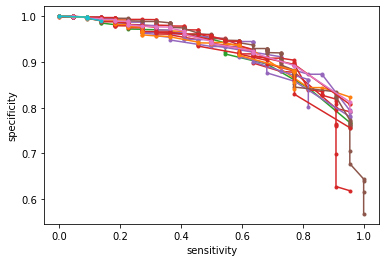

In [16]:
rules_repeated = np.array([])
for i in range(100):
    rulefit = imodels.RuleFitClassifier(max_rules=10, random_state=i)
    rulefit.fit(X_train_old, y_train_old, feature_names=feature_names)

    rules = rulefit.get_rules()
    rules = rules[rules.coef != 0].sort_values("support", ascending=False)
    rules_repeated = np.concatenate(
        (rules_repeated, 
         np.unique(np.array(rules['rule'].values.tolist()))),
        axis=None)
    
    stats, threshes = predict_and_save(rulefit, 'rulefit_children_old_' + str(i), X_train_old, X_tune_old, y_train_old, y_tune_old,
                                      MODELS_DIR = './models/rulefit_children_old/')

In [17]:
rules_repeated_times = np.unique(rules_repeated, return_counts=True)
rules_repeated_times = (rules_repeated_times[0][(-rules_repeated_times[1]).argsort()],
                        rules_repeated_times[1][(-rules_repeated_times[1]).argsort()])
pkl.dump(rules_repeated_times, open(oj('./models/rulefit_res/', 'children_old_rules_repeated_times' + '.pkl'), 'wb'))
rules_repeated_times

(array(['GCSMotor > 0.5', 'SFxBasHem_1 <= 0.5', 'SFxPalpDepress_1 <= 0.5',
        'SFxPalpDepress_1 <= 0.5 and SFxBasHem_1 <= 0.5',
        'SeizLen_4 <= 0.5 and SFxBasHem_1 <= 0.5', 'SeizLen_4 <= 0.5',
        'SFxPalpDepress_1 <= 0.5 and GCSMotor > 0.5',
        'SFxBasHem_1 <= 0.5 and GCSMotor > 0.5',
        'GCSEye > 0.5 and SFxPalpDepress_1 <= 0.5 and SFxBasHem_1 <= 0.5',
        'SFxPalpDepress_92 > 0.5 and SFxBasHem_1 <= 0.5',
        'AMSAgitated_1 <= 0.5 and GCSVerbal > 0.5',
        'GCSEye > 0.5 and SFxBasHem_1 <= 0.5',
        'SeizLen_4 <= 0.5 and SFxPalpDepress_1 <= 0.5',
        'SFxBasOto_1 <= 0.5 and GCSMotor > 0.5',
        'AMSSlow_1 <= 0.5 and SFxBasHem_1 <= 0.5',
        'GCSVerbal > 0.5 and GCSMotor > 0.5',
        'GCSVerbal > 0.5 and SFxBasHem_1 <= 0.5',
        'SFxBasHem_1 <= 0.5 and SFxPalp <= 0.5', 'SFxBasHem_92',
        'LocLen_92', 'LocLen_3 <= 0.5 and SFxBasHem_1 <= 0.5',
        'SFxBasHem_1 <= 0.5 and NeuroDSensory_0 <= 0.5',
        'SFxPalpDepress_

In [23]:
(rules_repeated_times[0][:8], rules_repeated_times[1][:8])

(array(['GCSMotor > 0.5', 'SFxBasHem_1 <= 0.5', 'SFxPalpDepress_1 <= 0.5',
        'SFxPalpDepress_1 <= 0.5 and SFxBasHem_1 <= 0.5',
        'SeizLen_4 <= 0.5 and SFxBasHem_1 <= 0.5', 'SeizLen_4 <= 0.5',
        'SFxPalpDepress_1 <= 0.5 and GCSMotor > 0.5',
        'SFxBasHem_1 <= 0.5 and GCSMotor > 0.5'], dtype='<U136'),
 array([80, 77, 39, 35, 19, 16, 15, 13]))

100%|███████████████████████████████████████████| 4/4 [00:00<00:00, 1243.86it/s]


100%|███████████████████████████████████████████| 5/5 [00:00<00:00, 1368.27it/s]


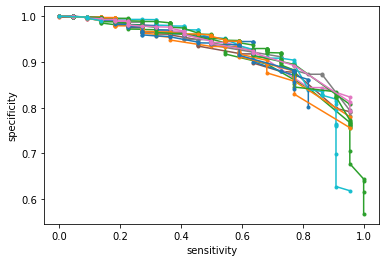

In [103]:
suffixes = ['_train', '_tune']  # _train, _test1, _test2
stats_list = {}
for i, suffix in enumerate(suffixes):
    stats_list[suffix] = print_metrics(suffix, X_train_old, X_tune_old, y_train_old, y_tune_old, MODELS_DIR = './models/rulefit_children_old/')

In [104]:
stats_list['_train']

,rulefit_children_old_0,rulefit_children_old_1,rulefit_children_old_10,rulefit_children_old_11,rulefit_children_old_12,rulefit_children_old_13,rulefit_children_old_14,rulefit_children_old_15,rulefit_children_old_16,rulefit_children_old_17,...,rulefit_children_old_90,rulefit_children_old_91,rulefit_children_old_92,rulefit_children_old_93,rulefit_children_old_94,rulefit_children_old_95,rulefit_children_old_96,rulefit_children_old_97,rulefit_children_old_98,rulefit_children_old_99
sens,0.17,0.17,0.17,0.17,0.17,0.85,0.17,0.17,0.17,0.17,...,0.17,0.17,0.17,0.17,0.17,0.17,0.86,0.17,0.17,0.23
spec,1.00,1.00,1.00,1.00,1.00,0.79,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,0.79,1.00,1.00,0.99
ppv,0.26,0.26,0.25,0.26,0.23,0.03,0.25,0.25,0.26,0.26,...,0.26,0.26,0.26,0.26,0.25,0.26,0.03,0.26,0.25,0.18
npv,0.99,0.99,0.99,0.99,0.99,1.00,0.99,0.99,0.99,0.99,...,0.99,0.99,0.99,0.99,0.99,0.99,1.00,0.99,0.99,0.99
lr+,54.05,54.05,51.41,54.05,44.85,4.03,51.41,51.41,54.05,54.05,...,54.05,54.05,54.05,54.05,51.41,54.05,4.07,54.05,51.41,33.27
lr-,0.84,0.84,0.84,0.84,0.84,0.20,0.84,0.84,0.84,0.84,...,0.84,0.84,0.84,0.84,0.84,0.84,0.18,0.84,0.84,0.78
brier_score,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
f1,0.20,0.20,0.20,0.20,0.19,0.05,0.20,0.20,0.20,0.20,...,0.20,0.20,0.20,0.20,0.20,0.20,0.05,0.20,0.20,0.20


In [105]:
stats_list['_tune']

,rulefit_children_old_0,rulefit_children_old_1,rulefit_children_old_10,rulefit_children_old_11,rulefit_children_old_12,rulefit_children_old_13,rulefit_children_old_14,rulefit_children_old_15,rulefit_children_old_16,rulefit_children_old_17,...,rulefit_children_old_90,rulefit_children_old_91,rulefit_children_old_92,rulefit_children_old_93,rulefit_children_old_94,rulefit_children_old_95,rulefit_children_old_96,rulefit_children_old_97,rulefit_children_old_98,rulefit_children_old_99
sens,0.09,0.09,0.09,0.09,0.09,0.95,0.09,0.09,0.09,0.09,...,0.09,0.09,0.09,0.09,0.09,0.09,0.95,0.09,0.09,0.14
spec,1.00,1.00,1.00,1.00,1.00,0.79,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,0.81,1.00,1.00,0.99
ppv,0.17,0.17,0.20,0.17,0.17,0.02,0.20,0.17,0.17,0.20,...,0.20,0.17,0.20,0.17,0.20,0.17,0.03,0.20,0.20,0.07
npv,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
lr+,38.00,38.00,47.50,38.00,38.00,4.58,47.50,38.00,38.00,47.50,...,47.50,38.00,47.50,38.00,47.50,38.00,5.10,47.50,47.50,14.25
lr-,0.91,0.91,0.91,0.91,0.91,0.06,0.91,0.91,0.91,0.91,...,0.91,0.91,0.91,0.91,0.91,0.91,0.06,0.91,0.91,0.87
brier_score,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
f1,0.12,0.12,0.12,0.12,0.12,0.05,0.12,0.12,0.12,0.12,...,0.12,0.12,0.12,0.12,0.12,0.12,0.05,0.12,0.12,0.09


In [121]:
stats_list['_tune'].iloc[:,(-np.array(stats_list['_tune'][0:1])).argsort().squeeze()[:10]]

,rulefit_children_old_65,rulefit_children_old_53,rulefit_children_old_96,rulefit_children_old_83,rulefit_children_old_13,rulefit_children_old_73,rulefit_children_old_64,rulefit_children_old_2,rulefit_children_old_41,rulefit_children_old_24
sens,1.00,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95
spec,0.64,0.62,0.81,0.81,0.79,0.76,0.78,0.77,0.82,0.79
ppv,0.01,0.01,0.03,0.03,0.02,0.02,0.02,0.02,0.03,0.02
npv,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
lr+,2.81,2.50,5.10,4.96,4.58,3.92,4.35,4.11,5.41,4.63
lr-,0.00,0.07,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06
brier_score,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
f1,0.03,0.03,0.05,0.05,0.05,0.04,0.04,0.04,0.05,0.05


In [122]:
rulefit = imodels.RuleFitClassifier(max_rules=10, random_state=96)
rulefit.fit(X_train_old, y_train_old, feature_names=feature_names)

rules = rulefit.get_rules()
rules = rules[rules.coef != 0].sort_values("support", ascending=False)

rules[['rule', 'coef', 'support']].style.background_gradient(cmap='viridis')

,rule,coef,support
141,SFxPalpDepress_1 <= 0.5 and SFxBasHem_1 <= 0.5,-0.500259,0.996073
139,NeuroDCranial_1 <= 0.5 and SFxBasHem_1 <= 0.5,-0.434528,0.993874
136,GCSEye > 0.5 and SFxPalpDepress_1 <= 0.5 and SFxBasHem_1 <= 0.5,-1.152193,0.991989
134,OSICut_1 <= 0.5 and SeizLen_4 <= 0.5 and GCSVerbal > 0.5,-0.202602,0.990104
138,LocLen_4 <= 0.5 and GCSEye > 0.5 and SFxBasPer_0 <= 0.5,-0.324745,0.986726
137,AMSAgitated_1 <= 0.5 and GCSVerbal > 0.5,-0.930617,0.985705
140,AMSSlow_1 <= 0.5 and SFxPalpDepress_92 > 0.5,-0.297363,0.970468
132,LocLen_3 <= 0.5 and SFxBasPer_0 <= 0.5,-0.056676,0.960807
135,NeuroDOth_1 <= 0.5 and AMSAgitated_1 <= 0.5 and AMSOth_0 <= 0.5 and GCSVerbal > 0.5,-0.071781,0.905121
133,LocLen_4 <= 0.5 and Vomit <= 0.5,-0.063694,0.882893


## Children young

100%|████████████████████████████████████████████| 8/8 [00:00<00:00, 943.73it/s]


100%|███████████████████████████████████████████| 4/4 [00:00<00:00, 1041.16it/s]


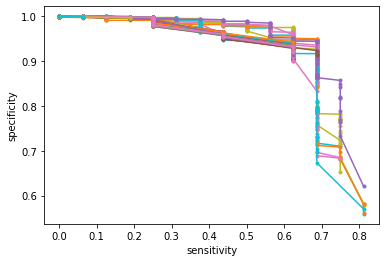

In [24]:
rules_repeated = np.array([])
for i in range(100):
    rulefit = imodels.RuleFitClassifier(max_rules=10, random_state=i)
    rulefit.fit(X_train_young, y_train_young, feature_names=feature_names)

    rules = rulefit.get_rules()
    rules = rules[rules.coef != 0].sort_values("support", ascending=False)
    rules_repeated = np.concatenate(
        (rules_repeated, 
         np.unique(np.array(rules['rule'].values.tolist()))),
        axis=None)
    
    stats, threshes = predict_and_save(rulefit, 'rulefit_children_young_' + str(i), X_train_young, X_tune_young, y_train_young, y_tune_young,
                                      MODELS_DIR = './models/rulefit_children_young/')

In [25]:
rules_repeated_times = np.unique(rules_repeated, return_counts=True)
rules_repeated_times = (rules_repeated_times[0][(-rules_repeated_times[1]).argsort()],
                        rules_repeated_times[1][(-rules_repeated_times[1]).argsort()])
pkl.dump(rules_repeated_times, open(oj('./models/rulefit_res/', 'children_young_rules_repeated_times' + '.pkl'), 'wb'))
rules_repeated_times

(array(['SeizLen_2 <= 0.5', 'AMSSlow_92 > 0.5', 'GCSVerbal',
        'SeizLen_2 <= 0.5 and AMSSlow_92 > 0.5',
        'SeizLen_2 <= 0.5 and AMSRepeat_1 <= 0.5', 'GCSVerbal > 0.5',
        'SeizLen_2 <= 0.5 and AMSSlow_0 <= 0.5', 'AMSOth_1 <= 0.5',
        'AMSSlow_92 > 0.5 and AMSOth_1 <= 0.5',
        'AMSSlow_1 <= 0.5 and AMSRepeat_1 <= 0.5',
        'SeizLen_2 <= 0.5 and AMSSlow_1 <= 0.5',
        'HASeverity_3 <= 0.5 and GCSVerbal > 0.5',
        'AMSSlow_1 <= 0.5 and AMSOth_1 <= 0.5',
        'SeizLen_2 <= 0.5 and AMSOth_1 <= 0.5',
        'AMSSlow_1 <= 0.5 and GCSVerbal > 0.5',
        'AMSSlow_92 > 0.5 and AMSRepeat_1 <= 0.5', 'HASeverity_1',
        'AMSSlow_0 <= 0.5', 'SeizLen_92 <= 0.5', 'HA_verb_0',
        'AMSSlow_1 <= 0.5', 'AMSAgitated_92', 'AMSSleep_92',
        'SeizLen_2 <= 0.5 and SFxPalpDepress_0 <= 0.5',
        'GCSEye > 0.5 and AMSSlow_92 > 0.5', 'SFxPalp <= 0.5',
        'HASeverity_92', 'LocLen_2 <= 0.5 and AMSSlow_92 > 0.5',
        'SeizLen_1 <= 0.5 and AMSSl

In [30]:
(rules_repeated_times[0][:10], rules_repeated_times[1][:10])

(array(['SeizLen_2 <= 0.5', 'AMSSlow_92 > 0.5', 'GCSVerbal',
        'SeizLen_2 <= 0.5 and AMSSlow_92 > 0.5',
        'SeizLen_2 <= 0.5 and AMSRepeat_1 <= 0.5', 'GCSVerbal > 0.5',
        'SeizLen_2 <= 0.5 and AMSSlow_0 <= 0.5', 'AMSOth_1 <= 0.5',
        'AMSSlow_92 > 0.5 and AMSOth_1 <= 0.5',
        'AMSSlow_1 <= 0.5 and AMSRepeat_1 <= 0.5'], dtype='<U151'),
 array([53, 31, 24, 22, 20, 19, 14, 12, 10, 10]))

100%|█████████████████████████████████████████| 24/24 [00:00<00:00, 1792.37it/s]


100%|███████████████████████████████████████████| 4/4 [00:00<00:00, 1405.01it/s]


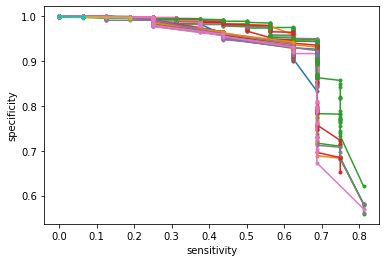

In [124]:
suffixes = ['_train', '_tune']  # _train, _test1, _test2
stats_list = {}
for i, suffix in enumerate(suffixes):
    stats_list[suffix] = print_metrics(suffix, X_train_young, X_tune_young, y_train_young, y_tune_young, MODELS_DIR = './models/rulefit_children_young/')

In [125]:
stats_list['_train']

,rulefit_children_young_0,rulefit_children_young_1,rulefit_children_young_10,rulefit_children_young_11,rulefit_children_young_12,rulefit_children_young_13,rulefit_children_young_14,rulefit_children_young_15,rulefit_children_young_16,rulefit_children_young_17,...,rulefit_children_young_90,rulefit_children_young_91,rulefit_children_young_92,rulefit_children_young_93,rulefit_children_young_94,rulefit_children_young_95,rulefit_children_young_96,rulefit_children_young_97,rulefit_children_young_98,rulefit_children_young_99
sens,0.71,0.65,0.20,0.20,0.24,0.18,0.20,0.18,0.67,0.20,...,0.22,0.63,0.20,0.20,0.65,0.20,0.65,0.20,0.24,0.20
spec,0.90,0.92,1.00,1.00,0.99,1.00,1.00,1.00,0.91,1.00,...,1.00,0.92,1.00,1.00,0.91,1.00,0.92,1.00,0.99,1.00
ppv,0.05,0.06,0.27,0.27,0.23,0.26,0.27,0.26,0.05,0.27,...,0.26,0.06,0.27,0.27,0.05,0.27,0.05,0.26,0.23,0.27
npv,1.00,1.00,0.99,0.99,0.99,0.99,0.99,0.99,1.00,0.99,...,0.99,1.00,0.99,0.99,1.00,0.99,1.00,0.99,0.99,0.99
lr+,7.04,8.28,52.03,52.03,41.11,50.57,52.03,50.57,7.74,52.03,...,49.84,8.28,52.03,52.03,7.59,52.03,7.95,48.44,41.11,52.03
lr-,0.33,0.38,0.81,0.81,0.77,0.83,0.81,0.83,0.36,0.81,...,0.79,0.40,0.81,0.81,0.39,0.81,0.38,0.81,0.77,0.81
brier_score,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
f1,0.09,0.10,0.23,0.23,0.23,0.21,0.23,0.21,0.10,0.23,...,0.24,0.10,0.23,0.23,0.09,0.23,0.10,0.22,0.23,0.23


In [126]:
stats_list['_tune']

,rulefit_children_young_0,rulefit_children_young_1,rulefit_children_young_10,rulefit_children_young_11,rulefit_children_young_12,rulefit_children_young_13,rulefit_children_young_14,rulefit_children_young_15,rulefit_children_young_16,rulefit_children_young_17,...,rulefit_children_young_90,rulefit_children_young_91,rulefit_children_young_92,rulefit_children_young_93,rulefit_children_young_94,rulefit_children_young_95,rulefit_children_young_96,rulefit_children_young_97,rulefit_children_young_98,rulefit_children_young_99
sens,0.62,0.62,0.06,0.06,0.19,0.06,0.06,0.06,0.62,0.06,...,0.06,0.62,0.06,0.06,0.62,0.06,0.62,0.06,0.19,0.06
spec,0.93,0.94,1.00,1.00,1.00,1.00,1.00,1.00,0.93,1.00,...,1.00,0.94,1.00,1.00,0.93,1.00,0.93,1.00,1.00,1.00
ppv,0.06,0.06,0.20,0.20,0.25,0.20,0.20,0.20,0.06,0.25,...,0.25,0.07,0.20,0.20,0.06,0.20,0.06,0.20,0.25,0.25
npv,1.00,1.00,0.99,0.99,0.99,0.99,0.99,0.99,1.00,0.99,...,0.99,1.00,0.99,0.99,1.00,0.99,1.00,0.99,0.99,0.99
lr+,8.99,9.93,37.98,37.98,50.65,37.98,37.98,37.98,8.94,50.65,...,50.65,10.85,37.98,37.98,9.15,37.98,9.04,37.98,50.65,50.65
lr-,0.40,0.40,0.94,0.94,0.82,0.94,0.94,0.94,0.40,0.94,...,0.94,0.40,0.94,0.94,0.40,0.94,0.40,0.94,0.82,0.94
brier_score,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
f1,0.10,0.11,0.10,0.10,0.21,0.10,0.10,0.10,0.10,0.10,...,0.10,0.12,0.10,0.10,0.10,0.10,0.10,0.10,0.21,0.10


In [127]:
stats_list['_tune'].iloc[:,(-np.array(stats_list['_tune'][0:1])).argsort().squeeze()[:10]]

,rulefit_children_young_69,rulefit_children_young_51,rulefit_children_young_29,rulefit_children_young_74,rulefit_children_young_38,rulefit_children_young_46,rulefit_children_young_48,rulefit_children_young_66,rulefit_children_young_36,rulefit_children_young_85
sens,0.81,0.81,0.81,0.81,0.81,0.75,0.75,0.75,0.69,0.69
spec,0.57,0.58,0.58,0.62,0.58,0.68,0.72,0.68,0.83,0.92
ppv,0.01,0.01,0.01,0.01,0.01,0.02,0.02,0.02,0.03,0.06
npv,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
lr+,1.89,1.94,1.94,2.14,1.94,2.37,2.71,2.38,4.12,8.99
lr-,0.33,0.32,0.32,0.30,0.32,0.37,0.35,0.37,0.38,0.34
brier_score,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
f1,0.02,0.02,0.02,0.03,0.02,0.03,0.03,0.03,0.05,0.10


In [128]:
rulefit = imodels.RuleFitClassifier(max_rules=10, random_state=74)
rulefit.fit(X_train_young, y_train_young, feature_names=feature_names)

rules = rulefit.get_rules()
rules = rules[rules.coef != 0].sort_values("support", ascending=False)

rules[['rule', 'coef', 'support']].style.background_gradient(cmap='viridis')

,rule,coef,support
127,AMSSlow_92 > 0.5 and SFxPalpDepress_0 <= 0.5,-0.562962,0.990991
128,LocLen_2 <= 0.5 and SFxPalp <= 0.5,-0.588888,0.967013
130,HASeverity_3 <= 0.5 and GCSEye > 0.5 and GCSVerbal > 0.5,-0.960454,0.963687
132,LOCSeparate <= 0.5 and SeizLen_1 <= 0.5 and AMSSlow_92 > 0.5,-0.532975,0.947609
126,SeizLen_92 <= 0.5 and HASeverity_3 <= 0.5 and AMSSlow_0 <= 0.5 and AMSSlow_92 > 0.5 and GCSVerbal > 0.5 and NeuroDSensory_0 <= 0.5,-0.527800,0.943451
123,SFxBasRhi_0 <= 0.5,-0.272529,0.932502
131,AMSSlow_92 > 0.5 and SFxBasHem_0 <= 0.5 and ClavNeck_1 <= 0.5,-0.865634,0.926542
129,AMSSleep_0 <= 0.5,-0.429525,0.915593
125,AMSOth_1 <= 0.5 and SFxBasPer_92 <= 0.5,-0.454512,0.906584
124,Amnesia_verb_0 <= 0.5,-0.099630,0.821206


In [129]:
rulefit = imodels.RuleFitClassifier(max_rules=10, random_state=85)
rulefit.fit(X_train_young, y_train_young, feature_names=feature_names)

rules = rulefit.get_rules()
rules = rules[rules.coef != 0].sort_values("support", ascending=False)

rules[['rule', 'coef', 'support']].style.background_gradient(cmap='viridis')

,rule,coef,support
5,GCSVerbal,-0.401452,1.000000
129,SeizLen_2 <= 0.5 and GCSEye > 0.5,-0.516571,0.998060
130,AMSSlow_1 <= 0.5 and AMSOth_1 <= 0.5,-0.026313,0.997228
128,HASeverity_3 <= 0.5 and AMSSlow_0 <= 0.5 and AMSSlow_1 <= 0.5,-0.519731,0.988496
125,LocLen_2 <= 0.5 and AMSSlow_0 <= 0.5 and AMSSlow_1 <= 0.5 and SFxBasHem_92 > 0.5 and ClavTem_1 <= 0.5,-0.827540,0.985170
123,Seiz <= 0.5 and AMSSlow_0 <= 0.5 and AMSSlow_92 > 0.5 and SFxPalpDepress_0 <= 0.5,-0.306254,0.980319
124,SeizLen_92 <= 0.5 and NeuroDSensory_0 <= 0.5,-0.164281,0.975052
126,GCSVerbal > 0.5,-0.396980,0.971171
127,AMSRepeat_1 <= 0.5 and SFxPalp <= 0.5,-0.429859,0.968954


## Children all

100%|████████████████████████████████████████████| 7/7 [00:00<00:00, 429.46it/s]


100%|███████████████████████████████████████████| 6/6 [00:00<00:00, 1122.77it/s]
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 904.30it/s]


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 1082.86it/s]


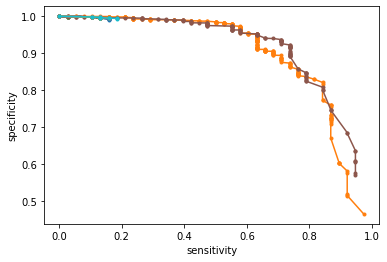

In [37]:
rules_repeated = np.array([])
for i in range(100):
    rulefit = imodels.RuleFitClassifier(max_rules=10, random_state=i)
    rulefit.fit(X_train_all, y_train_all, feature_names=feature_names_ageinvariant)

    rules = rulefit.get_rules()
    rules = rules[rules.coef != 0].sort_values("support", ascending=False)
    rules_repeated = np.concatenate(
        (rules_repeated, 
         np.unique(np.array(rules['rule'].values.tolist()))),
        axis=None)
    
    stats, threshes = predict_and_save(rulefit, 'rulefit_children_all_' + str(i), X_train_all, X_tune_all, y_train_all, y_tune_all,
                                      MODELS_DIR = './models/rulefit_children_all/')

In [38]:
rules_repeated_times = np.unique(rules_repeated, return_counts=True)
rules_repeated_times = (rules_repeated_times[0][(-rules_repeated_times[1]).argsort()],
                        rules_repeated_times[1][(-rules_repeated_times[1]).argsort()])
pkl.dump(rules_repeated_times, open(oj('./models/rulefit_res/', 'children_all_rules_repeated_times' + '.pkl'), 'wb'))
rules_repeated_times

(array(['SeizLen_4 <= 0.5',
        'SFxPalpDepress_1 <= 0.5 and SFxBasHem_1 <= 0.5',
        'SFxBasHem_1 <= 0.5', 'SFxPalpDepress_92 > 0.5',
        'SeizLen_4 <= 0.5 and SFxBasHem_1 <= 0.5',
        'SeizLen_4 <= 0.5 and SFxPalpDepress_1 <= 0.5',
        'SFxPalpDepress_92 > 0.5 and SFxBasHem_1 <= 0.5',
        'SFxPalpDepress_1 <= 0.5',
        'SeizLen_4 <= 0.5 and SFxPalpDepress_0 <= 0.5',
        'SeizLen_4 <= 0.5 and SFxPalpDepress_92 > 0.5',
        'SeizLen_3 <= 0.5 and SFxBasHem_1 <= 0.5',
        'SFxPalpDepress_0 <= 0.5',
        'SFxPalpDepress_1 <= 0.5 and SFxBasOto_1 <= 0.5',
        'SeizLen_4 <= 0.5 and SFxBasOto_1 <= 0.5',
        'SFxPalpDepress_0 <= 0.5 and SFxBasHem_1 <= 0.5',
        'SFxPalpDepress_92 > 0.5 and SFxBasOto_1 <= 0.5',
        'SFxBasHem_1 <= 0.5 and NeuroDCranial_1 <= 0.5',
        'SeizLen_4 <= 0.5 and SFxPalpDepress_1 <= 0.5 and SFxBasHem_1 <= 0.5',
        'SeizLen_3 <= 0.5 and SeizLen_4 <= 0.5',
        'SeizLen_4 <= 0.5 and NeuroDCranial_1 <= 

In [43]:
(rules_repeated_times[0][:10], rules_repeated_times[1][:10])

(array(['SeizLen_4 <= 0.5',
        'SFxPalpDepress_1 <= 0.5 and SFxBasHem_1 <= 0.5',
        'SFxBasHem_1 <= 0.5', 'SFxPalpDepress_92 > 0.5',
        'SeizLen_4 <= 0.5 and SFxBasHem_1 <= 0.5',
        'SeizLen_4 <= 0.5 and SFxPalpDepress_1 <= 0.5',
        'SFxPalpDepress_92 > 0.5 and SFxBasHem_1 <= 0.5',
        'SFxPalpDepress_1 <= 0.5',
        'SeizLen_4 <= 0.5 and SFxPalpDepress_0 <= 0.5',
        'SeizLen_4 <= 0.5 and SFxPalpDepress_92 > 0.5'], dtype='<U111'),
 array([73, 59, 57, 48, 33, 26, 22, 20, 19, 18]))

100%|███████████████████████████████████████████| 5/5 [00:00<00:00, 1142.55it/s]


100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 1227.39it/s]


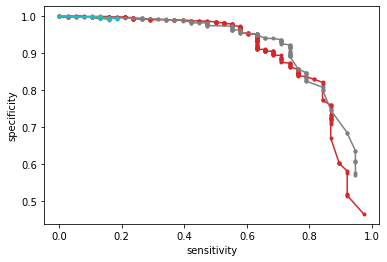

In [130]:
suffixes = ['_train', '_tune']  # _train, _test1, _test2
stats_list = {}
for i, suffix in enumerate(suffixes):
    stats_list[suffix] = print_metrics(suffix, X_train_all, X_tune_all, y_train_all, y_tune_all, MODELS_DIR = './models/rulefit_children_all/')

In [131]:
stats_list['_train']

,rulefit_children_all_0,rulefit_children_all_1,rulefit_children_all_10,rulefit_children_all_11,rulefit_children_all_12,rulefit_children_all_13,rulefit_children_all_14,rulefit_children_all_15,rulefit_children_all_16,rulefit_children_all_17,...,rulefit_children_all_90,rulefit_children_all_91,rulefit_children_all_92,rulefit_children_all_93,rulefit_children_all_94,rulefit_children_all_95,rulefit_children_all_96,rulefit_children_all_97,rulefit_children_all_98,rulefit_children_all_99
sens,0.19,0.21,0.19,0.95,0.20,0.21,0.20,0.95,0.19,0.19,...,0.20,0.20,0.19,0.21,0.19,0.21,0.19,0.19,0.19,0.23
spec,1.00,0.99,1.00,0.59,0.99,0.99,1.00,0.57,1.00,1.00,...,0.99,0.99,1.00,0.99,1.00,0.99,1.00,1.00,1.00,0.99
ppv,0.23,0.18,0.23,0.02,0.20,0.18,0.21,0.01,0.23,0.23,...,0.21,0.21,0.23,0.18,0.23,0.18,0.23,0.21,0.23,0.15
npv,0.99,0.99,0.99,1.00,0.99,0.99,0.99,1.00,0.99,0.99,...,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99
lr+,43.36,31.29,43.36,2.31,37.03,33.25,40.02,2.19,43.36,43.36,...,38.47,38.47,43.36,33.25,43.36,33.25,43.36,39.75,43.36,25.85
lr-,0.81,0.79,0.81,0.09,0.80,0.79,0.80,0.09,0.81,0.81,...,0.80,0.80,0.81,0.79,0.81,0.79,0.81,0.81,0.81,0.78
brier_score,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
f1,0.21,0.19,0.21,0.03,0.20,0.20,0.21,0.03,0.21,0.21,...,0.20,0.20,0.21,0.20,0.21,0.20,0.21,0.20,0.21,0.18


In [132]:
stats_list['_tune']

,rulefit_children_all_0,rulefit_children_all_1,rulefit_children_all_10,rulefit_children_all_11,rulefit_children_all_12,rulefit_children_all_13,rulefit_children_all_14,rulefit_children_all_15,rulefit_children_all_16,rulefit_children_all_17,...,rulefit_children_all_90,rulefit_children_all_91,rulefit_children_all_92,rulefit_children_all_93,rulefit_children_all_94,rulefit_children_all_95,rulefit_children_all_96,rulefit_children_all_97,rulefit_children_all_98,rulefit_children_all_99
sens,0.13,0.13,0.13,0.97,0.13,0.13,0.13,0.95,0.13,0.13,...,0.16,0.16,0.13,0.13,0.13,0.13,0.13,0.13,0.13,0.18
spec,1.00,1.00,1.00,0.47,1.00,1.00,1.00,0.64,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.99
ppv,0.18,0.18,0.19,0.01,0.18,0.18,0.19,0.01,0.19,0.19,...,0.16,0.16,0.18,0.19,0.18,0.18,0.19,0.19,0.19,0.15
npv,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
lr+,37.82,37.82,39.54,1.82,37.82,37.82,39.54,2.61,39.54,39.54,...,32.62,32.62,37.82,39.54,37.82,37.82,39.54,39.54,39.54,30.45
lr-,0.87,0.87,0.87,0.06,0.87,0.87,0.87,0.08,0.87,0.87,...,0.85,0.85,0.87,0.87,0.87,0.87,0.87,0.87,0.87,0.82
brier_score,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
f1,0.15,0.15,0.15,0.02,0.15,0.15,0.15,0.03,0.15,0.15,...,0.16,0.16,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.16


In [133]:
stats_list['_tune'].iloc[:,(-np.array(stats_list['_tune'][0:1])).argsort().squeeze()[:10]]

,rulefit_children_all_11,rulefit_children_all_15,rulefit_children_all_99,rulefit_children_all_64,rulefit_children_all_50,rulefit_children_all_49,rulefit_children_all_67,rulefit_children_all_41,rulefit_children_all_36,rulefit_children_all_78
sens,0.97,0.95,0.18,0.16,0.16,0.16,0.16,0.16,0.16,0.16
spec,0.47,0.64,0.99,1.00,0.99,1.00,1.00,0.99,0.99,1.00
ppv,0.01,0.01,0.15,0.16,0.15,0.16,0.16,0.15,0.12,0.15
npv,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
lr+,1.82,2.61,30.45,32.62,30.70,32.62,32.62,29.82,24.85,31.63
lr-,0.06,0.08,0.82,0.85,0.85,0.85,0.85,0.85,0.85,0.85
brier_score,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
f1,0.02,0.03,0.16,0.16,0.15,0.16,0.16,0.15,0.14,0.16


In [134]:
rulefit = imodels.RuleFitClassifier(max_rules=10, random_state=15)
rulefit.fit(X_train_all, y_train_all, feature_names=feature_names_ageinvariant)

rules = rulefit.get_rules()
rules = rules[rules.coef != 0].sort_values("support", ascending=False)

rules[['rule', 'coef', 'support']].style.background_gradient(cmap='viridis')

,rule,coef,support
18,LocLen_92,-0.504989,1.000000
125,SFxBasRet_0 <= 0.5 and NeuroDCranial_1 <= 0.5,-0.324036,0.992580
124,AMSAgitated_1 <= 0.5 and SFxBasHem_1 <= 0.5,-0.000157,0.984108
128,SeizLen_4 <= 0.5 and SFxPalp <= 0.5,-0.936034,0.978844
127,OSICspine_1 <= 0.5 and AMSAgitated_1 <= 0.5 and SFxPalpDepress_92 > 0.5,-0.011857,0.972928
120,AMSSlow_1 <= 0.5 and AMSRepeat_1 <= 0.5 and SFxPalpDepress_92 > 0.5 and SFxBasHem_1 <= 0.5,-0.957239,0.970021
122,AMSOth_0 <= 0.5 and SFxBasHem_1 <= 0.5,-1.099963,0.912318
126,HemaLoc_3 <= 0.5,-0.381226,0.904547
123,Vomit <= 0.5,-0.532588,0.876172
121,LocLen_4 <= 0.5 and ActNorm > 0.5,-0.292087,0.869805


In [135]:
rulefit = imodels.RuleFitClassifier(max_rules=10, random_state=64)
rulefit.fit(X_train_all, y_train_all, feature_names=feature_names_ageinvariant)

rules = rulefit.get_rules()
rules = rules[rules.coef != 0].sort_values("support", ascending=False)

rules[['rule', 'coef', 'support']].style.background_gradient(cmap='viridis')

,rule,coef,support
120,SeizLen_4 <= 0.5 and SFxPalpDepress_0 <= 0.5,-0.601211,0.998596
119,SeizLen_4 <= 0.5 and SFxPalpDepress_1 <= 0.5,-0.506981,0.998446
121,SeizLen_4 <= 0.5 and SFxBasOto_1 <= 0.5 and NeuroDCranial_1 <= 0.5,-0.017292,0.997092
122,SeizLen_4 <= 0.5 and SFxBasHem_1 <= 0.5,-0.787752,0.996791
123,OSICut_1 <= 0.5 and SFxPalpDepress_92 > 0.5,-0.043004,0.996641
124,SFxPalpDepress_1 <= 0.5 and SFxBasHem_1 <= 0.5,-0.620482,0.995638


## Children old parent

100%|█████████████████████████████████████████| 53/53 [00:00<00:00, 2177.69it/s]


100%|█████████████████████████████████████████| 32/32 [00:00<00:00, 2323.23it/s]


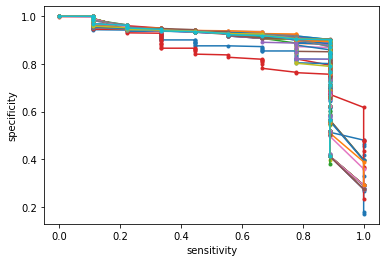

In [46]:
rules_repeated = np.array([])
for i in range(100):
    rulefit = imodels.RuleFitClassifier(max_rules=10, random_state=i)
    rulefit.fit(X_train_old_parent, y_train_old_parent, feature_names=feature_names_parent)

    rules = rulefit.get_rules()
    rules = rules[rules.coef != 0].sort_values("support", ascending=False)
    rules_repeated = np.concatenate(
        (rules_repeated, 
         np.unique(np.array(rules['rule'].values.tolist()))),
        axis=None)
    
    stats, threshes = predict_and_save(rulefit, 'rulefit_children_old_parent_' + str(i), X_train_old_parent, X_tune_old_parent, y_train_old_parent, y_tune_old_parent,
                                      MODELS_DIR = './models/rulefit_children_old_parent/')

In [47]:
rules_repeated_times = np.unique(rules_repeated, return_counts=True)
rules_repeated_times = (rules_repeated_times[0][(-rules_repeated_times[1]).argsort()],
                        rules_repeated_times[1][(-rules_repeated_times[1]).argsort()])
pkl.dump(rules_repeated_times, open(oj('./models/rulefit_res/', 'children_old_parent_rules_repeated_times' + '.pkl'), 'wb'))
rules_repeated_times

(array(['Seiz <= 0.5 and SFxBas <= 0.5', 'Vomit <= 0.5',
        'GCSTotal > 0.5 and SFxBas <= 0.5', 'SFxBas <= 0.5',
        'LOCSeparate <= 0.5', 'Seiz <= 0.5 and AMS <= 0.5',
        'GCSTotal > 0.5', 'GCSTotal', 'AMS <= 0.5',
        'Seiz <= 0.5 and GCSTotal > 0.5 and SFxBas <= 0.5', 'OSI',
        'SFxBas <= 0.5 and Hema <= 0.5',
        'Amnesia_verb_91 <= 0.5 and Vomit <= 0.5',
        'Seiz <= 0.5 and GCSTotal > 0.5', 'Vomit <= 0.5 and SFxBas <= 0.5',
        'Amnesia_verb_91 <= 0.5 and GCSTotal > 0.5 and SFxBas <= 0.5',
        'Hema <= 0.5', 'Amnesia_verb_91 <= 0.5 and SFxBas <= 0.5',
        'LOCSeparate <= 0.5 and Seiz <= 0.5',
        'Amnesia_verb_91 <= 0.5 and GCSTotal > 0.5',
        'High_impact_InjSev_3 <= 0.5 and GCSTotal > 0.5',
        'Seiz <= 0.5 and Hema <= 0.5', 'GCSTotal > 0.5 and AMS <= 0.5',
        'Seiz <= 0.5 and Amnesia_verb_91 <= 0.5 and GCSTotal > 0.5',
        'LOCSeparate <= 0.5 and SFxBas <= 0.5', 'Seiz <= 0.5',
        'Seiz <= 0.5 and SFxBas <= 0

In [53]:
(rules_repeated_times[0][:15], rules_repeated_times[1][:15])

(array(['Seiz <= 0.5 and SFxBas <= 0.5', 'Vomit <= 0.5',
        'GCSTotal > 0.5 and SFxBas <= 0.5', 'SFxBas <= 0.5',
        'LOCSeparate <= 0.5', 'Seiz <= 0.5 and AMS <= 0.5',
        'GCSTotal > 0.5', 'GCSTotal', 'AMS <= 0.5',
        'Seiz <= 0.5 and GCSTotal > 0.5 and SFxBas <= 0.5', 'OSI',
        'SFxBas <= 0.5 and Hema <= 0.5',
        'Amnesia_verb_91 <= 0.5 and Vomit <= 0.5',
        'Seiz <= 0.5 and GCSTotal > 0.5', 'Vomit <= 0.5 and SFxBas <= 0.5'],
       dtype='<U96'),
 array([72, 63, 51, 42, 38, 35, 33, 33, 28, 26, 25, 24, 23, 21, 20]))

100%|███████████████████████████████████████████| 6/6 [00:00<00:00, 1880.29it/s]


100%|█████████████████████████████████████████| 32/32 [00:00<00:00, 2620.16it/s]


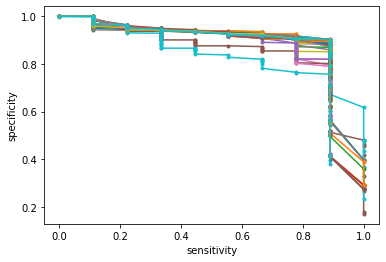

In [136]:
suffixes = ['_train', '_tune']  # _train, _test1, _test2
stats_list = {}
for i, suffix in enumerate(suffixes):
    stats_list[suffix] = print_metrics(suffix, X_train_old_parent, X_tune_old_parent, y_train_old_parent, y_tune_old_parent, MODELS_DIR = './models/rulefit_children_old_parent/')

In [137]:
stats_list['_train']

,rulefit_children_old_parent_0,rulefit_children_old_parent_1,rulefit_children_old_parent_10,rulefit_children_old_parent_11,rulefit_children_old_parent_12,rulefit_children_old_parent_13,rulefit_children_old_parent_14,rulefit_children_old_parent_15,rulefit_children_old_parent_16,rulefit_children_old_parent_17,...,rulefit_children_old_parent_90,rulefit_children_old_parent_91,rulefit_children_old_parent_92,rulefit_children_old_parent_93,rulefit_children_old_parent_94,rulefit_children_old_parent_95,rulefit_children_old_parent_96,rulefit_children_old_parent_97,rulefit_children_old_parent_98,rulefit_children_old_parent_99
sens,0.50,0.93,0.95,0.93,0.93,0.93,0.95,0.50,0.93,0.50,...,0.93,0.95,0.50,0.50,0.95,0.95,0.50,0.95,0.93,0.93
spec,0.95,0.72,0.63,0.72,0.72,0.72,0.67,0.95,0.72,0.95,...,0.72,0.66,0.95,0.95,0.69,0.67,0.95,0.54,0.72,0.72
ppv,0.21,0.07,0.06,0.07,0.07,0.07,0.06,0.21,0.07,0.21,...,0.07,0.06,0.21,0.21,0.07,0.06,0.21,0.05,0.07,0.07
npv,0.99,1.00,1.00,1.00,1.00,1.00,1.00,0.99,1.00,0.99,...,1.00,1.00,0.99,0.99,1.00,1.00,0.99,1.00,1.00,1.00
lr+,11.04,3.31,2.54,3.31,3.31,3.31,2.89,11.04,3.31,11.04,...,3.31,2.78,11.04,11.04,3.02,2.85,11.04,2.09,3.31,3.31
lr-,0.52,0.10,0.08,0.10,0.10,0.10,0.07,0.52,0.10,0.52,...,0.10,0.07,0.52,0.52,0.07,0.07,0.52,0.09,0.10,0.10
brier_score,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
f1,0.29,0.13,0.11,0.13,0.13,0.13,0.12,0.29,0.13,0.29,...,0.13,0.12,0.29,0.29,0.12,0.12,0.29,0.09,0.13,0.13


In [138]:
stats_list['_tune']

,rulefit_children_old_parent_0,rulefit_children_old_parent_1,rulefit_children_old_parent_10,rulefit_children_old_parent_11,rulefit_children_old_parent_12,rulefit_children_old_parent_13,rulefit_children_old_parent_14,rulefit_children_old_parent_15,rulefit_children_old_parent_16,rulefit_children_old_parent_17,...,rulefit_children_old_parent_90,rulefit_children_old_parent_91,rulefit_children_old_parent_92,rulefit_children_old_parent_93,rulefit_children_old_parent_94,rulefit_children_old_parent_95,rulefit_children_old_parent_96,rulefit_children_old_parent_97,rulefit_children_old_parent_98,rulefit_children_old_parent_99
sens,0.22,0.89,0.89,0.89,0.89,0.89,0.89,0.22,0.89,0.22,...,0.89,1.00,0.22,0.22,1.00,0.89,0.22,0.89,0.89,0.89
spec,0.95,0.89,0.90,0.88,0.89,0.90,0.89,0.95,0.90,0.95,...,0.88,0.39,0.95,0.95,0.27,0.90,0.95,0.87,0.90,0.90
ppv,0.07,0.10,0.12,0.10,0.10,0.12,0.10,0.07,0.12,0.07,...,0.10,0.02,0.07,0.07,0.02,0.12,0.07,0.09,0.12,0.12
npv,0.99,1.00,1.00,1.00,1.00,1.00,1.00,0.99,1.00,0.99,...,1.00,1.00,0.99,0.99,1.00,1.00,0.99,1.00,1.00,1.00
lr+,4.79,7.78,9.10,7.67,7.78,9.10,7.78,4.79,9.10,4.79,...,7.67,1.64,4.79,4.79,1.38,9.26,4.79,6.97,9.10,9.10
lr-,0.82,0.13,0.12,0.13,0.13,0.12,0.13,0.82,0.12,0.82,...,0.13,0.00,0.82,0.82,0.00,0.12,0.82,0.13,0.12,0.12
brier_score,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
f1,0.10,0.19,0.21,0.18,0.19,0.21,0.19,0.10,0.21,0.10,...,0.18,0.05,0.10,0.10,0.04,0.21,0.10,0.17,0.21,0.21


In [139]:
stats_list['_tune'].iloc[:,(-np.array(stats_list['_tune'][0:1])).argsort().squeeze()[:10]]

,rulefit_children_old_parent_53,rulefit_children_old_parent_40,rulefit_children_old_parent_56,rulefit_children_old_parent_60,rulefit_children_old_parent_2,rulefit_children_old_parent_45,rulefit_children_old_parent_94,rulefit_children_old_parent_91,rulefit_children_old_parent_89,rulefit_children_old_parent_6
sens,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.89,0.89
spec,0.62,0.48,0.36,0.40,0.40,0.40,0.27,0.39,0.90,0.90
ppv,0.04,0.03,0.02,0.02,0.02,0.02,0.02,0.02,0.12,0.12
npv,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
lr+,2.61,1.92,1.56,1.65,1.66,1.66,1.38,1.64,9.10,9.10
lr-,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.12
brier_score,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
f1,0.07,0.05,0.04,0.05,0.05,0.05,0.04,0.05,0.21,0.21


In [140]:
rulefit = imodels.RuleFitClassifier(max_rules=10, random_state=53)
rulefit.fit(X_train_old_parent, y_train_old_parent, feature_names=feature_names_parent)

rules = rulefit.get_rules()
rules = rules[rules.coef != 0].sort_values("support", ascending=False)

rules[['rule', 'coef', 'support']].style.background_gradient(cmap='viridis')

,rule,coef,support
3,HA_verb,0.040259,1.000000
14,High_impact_InjSev_2,-0.708392,1.000000
21,Amnesia_verb_91 <= 0.5 and SFxBas <= 0.5,-0.163379,0.957377
25,Seiz <= 0.5 and GCSTotal > 0.5 and SFxBas <= 0.5,-1.257203,0.944262
22,Vomit <= 0.5,-0.419332,0.932787
23,Vomit <= 0.5 and SFxBas <= 0.5,-1.075931,0.925683
20,Seiz <= 0.5 and Amnesia_verb_91 <= 0.5 and GCSTotal > 0.5,-0.494774,0.920219
19,LOCSeparate <= 0.5,-1.346073,0.677049
24,LOCSeparate > 0.5 and Amnesia_verb_91 <= 0.5 and Hema <= 0.5,-1.011012,0.225137
27,HA_verb > 0.5 and AMS > 0.5,1.508772,0.089071


In [141]:
rulefit = imodels.RuleFitClassifier(max_rules=10, random_state=89)
rulefit.fit(X_train_old_parent, y_train_old_parent, feature_names=feature_names_parent)

rules = rulefit.get_rules()
rules = rules[rules.coef != 0].sort_values("support", ascending=False)

rules[['rule', 'coef', 'support']].style.background_gradient(cmap='viridis')

,rule,coef,support
23,Seiz <= 0.5 and SFxBas <= 0.5,-0.330839,0.983607
26,Seiz <= 0.5 and GCSTotal > 0.5 and SFxBas <= 0.5,-0.978786,0.944262
24,Vomit <= 0.5,-0.827395,0.932787
25,Amnesia_verb_91 <= 0.5 and GCSTotal > 0.5 and SFxBas <= 0.5,-0.686116,0.919672
21,Seiz <= 0.5 and Amnesia_verb_91 <= 0.5 and Vomit <= 0.5,-0.284248,0.895628
22,AMS <= 0.5,-0.542997,0.842077
20,SFxBas <= 0.5 and Hema <= 0.5,-0.212666,0.682514
19,LOCSeparate <= 0.5,-0.217231,0.677049


## Children young parent

In [72]:
print(sum(y_train_young_parent))
print(sum(y_tune_young_parent))


5
0


###### Cannot fit here.

In [66]:
rules_repeated = np.array([])
for i in range(9,100):
    rulefit = imodels.RuleFitClassifier(max_rules=10, random_state=i)
    rulefit.fit(X_train_young_parent, y_train_young_parent, feature_names=feature_names_parent)

    rules = rulefit.get_rules()
    rules = rules[rules.coef != 0].sort_values("support", ascending=False)
    rules_repeated = np.concatenate(
        (rules_repeated, 
         np.unique(np.array(rules['rule'].values.tolist()))),
        axis=None)
    
    stats, threshes = predict_and_save(rulefit, 'rulefit_children_young_parent_' + str(i), X_train_young_parent, X_tune_young_parent, y_train_young_parent, y_tune_young_parent,
                                      MODELS_DIR = './models/rulefit_children_young_parent/')

 86%|████████████████████████████████████▊      | 6/7 [00:00<00:00, 1235.80it/s]


ValueError: not enough values to unpack (expected 4, got 1)

In [ ]:
rules_repeated_times = np.unique(rules_repeated, return_counts=True)
rules_repeated_times = (rules_repeated_times[0][(-rules_repeated_times[1]).argsort()],
                        rules_repeated_times[1][(-rules_repeated_times[1]).argsort()])
pkl.dump(rules_repeated_times, open(oj('./models/rulefit_res/', 'children_young_parent_rules_repeated_times' + '.pkl'), 'wb'))
rules_repeated_times

In [55]:
(rules_repeated_times[0][:16], rules_repeated_times[1][:16])

(array(['Seiz <= 0.5 and SFxBas <= 0.5', 'Vomit <= 0.5',
        'GCSTotal > 0.5 and SFxBas <= 0.5', 'SFxBas <= 0.5',
        'LOCSeparate <= 0.5', 'Seiz <= 0.5 and AMS <= 0.5',
        'GCSTotal > 0.5', 'GCSTotal', 'AMS <= 0.5',
        'Seiz <= 0.5 and GCSTotal > 0.5 and SFxBas <= 0.5', 'OSI',
        'SFxBas <= 0.5 and Hema <= 0.5',
        'Amnesia_verb_91 <= 0.5 and Vomit <= 0.5',
        'Seiz <= 0.5 and GCSTotal > 0.5', 'Vomit <= 0.5 and SFxBas <= 0.5',
        'Amnesia_verb_91 <= 0.5 and GCSTotal > 0.5 and SFxBas <= 0.5'],
       dtype='<U96'),
 array([72, 63, 51, 42, 38, 35, 33, 33, 28, 26, 25, 24, 23, 21, 20, 17]))

In [ ]:
suffixes = ['_train', '_tune']  # _train, _test1, _test2
stats_list = {}
for i, suffix in enumerate(suffixes):
    stats_list[suffix] = print_metrics(suffix, X_train_young_parent, X_tune_young_parent, y_train_young_parent, y_tune_young_parent, MODELS_DIR = './models/rulefit_children_young_parent/')

In [ ]:
stats_list['_train']

In [ ]:
stats_list['_tune']

## Children all parent

100%|█████████████████████████████████████████| 62/62 [00:00<00:00, 1988.46it/s]


100%|███████████████████████████████████████████| 5/5 [00:00<00:00, 1449.41it/s]


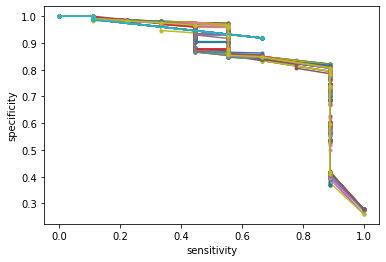

In [58]:
rules_repeated = np.array([])
for i in range(100):
    rulefit = imodels.RuleFitClassifier(max_rules=10, random_state=i)
    rulefit.fit(X_train_all_parent, y_train_all_parent, feature_names=feature_names_ageinvariant_parent)

    rules = rulefit.get_rules()
    rules = rules[rules.coef != 0].sort_values("support", ascending=False)
    rules_repeated = np.concatenate(
        (rules_repeated, 
         np.unique(np.array(rules['rule'].values.tolist()))),
        axis=None)
    
    stats, threshes = predict_and_save(rulefit, 'rulefit_children_all_parent_' + str(i), X_train_all_parent, X_tune_all_parent, y_train_all_parent, y_tune_all_parent,
                                      MODELS_DIR = './models/rulefit_children_all_parent/')

In [59]:
rules_repeated_times = np.unique(rules_repeated, return_counts=True)
rules_repeated_times = (rules_repeated_times[0][(-rules_repeated_times[1]).argsort()],
                        rules_repeated_times[1][(-rules_repeated_times[1]).argsort()])
pkl.dump(rules_repeated_times, open(oj('./models/rulefit_res/', 'children_all_parent_rules_repeated_times' + '.pkl'), 'wb'))
rules_repeated_times

(array(['Vomit <= 0.5', 'SFxBas <= 0.5', 'Seiz <= 0.5 and AMS <= 0.5',
        'Seiz <= 0.5 and SFxBas <= 0.5',
        'SFxPalp <= 0.5 and SFxBas <= 0.5',
        'Vomit <= 0.5 and SFxBas <= 0.5',
        'LOCSeparate <= 0.5 and Seiz <= 0.5',
        'SFxBas <= 0.5 and Hema <= 0.5', 'OSI > 0.5 and AMS <= 0.5',
        'LOCSeparate <= 0.5', 'OSI', 'Seiz <= 0.5 and Hema <= 0.5',
        'High_impact_InjSev_1 <= 0.5 and AMS <= 0.5',
        'High_impact_InjSev_1 <= 0.5 and SFxBas <= 0.5', 'AMS <= 0.5',
        'Seiz <= 0.5 and SFxBas <= 0.5 and Hema <= 0.5', 'Hema <= 0.5',
        'Seiz <= 0.5', 'SFxPalp <= 0.5',
        'High_impact_InjSev_2 > 0.5 and SFxBas <= 0.5',
        'High_impact_InjSev_2',
        'Seiz <= 0.5 and SFxPalp <= 0.5 and SFxBas <= 0.5',
        'High_impact_InjSev_2 > 0.5',
        'LOCSeparate <= 0.5 and Seiz <= 0.5 and SFxBas <= 0.5',
        'Seiz <= 0.5 and OSI > 0.5 and AMS <= 0.5',
        'ActNorm > 0.5 and SFxPalp <= 0.5 and SFxBas <= 0.5',
        'Vomit <=

In [64]:
(rules_repeated_times[0][:14], rules_repeated_times[1][:14])

(array(['Vomit <= 0.5', 'SFxBas <= 0.5', 'Seiz <= 0.5 and AMS <= 0.5',
        'Seiz <= 0.5 and SFxBas <= 0.5',
        'SFxPalp <= 0.5 and SFxBas <= 0.5',
        'Vomit <= 0.5 and SFxBas <= 0.5',
        'LOCSeparate <= 0.5 and Seiz <= 0.5',
        'SFxBas <= 0.5 and Hema <= 0.5', 'OSI > 0.5 and AMS <= 0.5',
        'LOCSeparate <= 0.5', 'OSI', 'Seiz <= 0.5 and Hema <= 0.5',
        'High_impact_InjSev_1 <= 0.5 and AMS <= 0.5',
        'High_impact_InjSev_1 <= 0.5 and SFxBas <= 0.5'], dtype='<U95'),
 array([99, 80, 70, 64, 52, 47, 47, 41, 26, 25, 22, 20, 16, 16]))

100%|█████████████████████████████████████████| 39/39 [00:00<00:00, 2105.06it/s]


100%|███████████████████████████████████████████| 5/5 [00:00<00:00, 1638.78it/s]


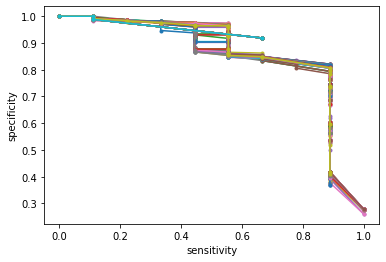

In [142]:
suffixes = ['_train', '_tune']  # _train, _test1, _test2
stats_list = {}
for i, suffix in enumerate(suffixes):
    stats_list[suffix] = print_metrics(suffix, X_train_all_parent, X_tune_all_parent, y_train_all_parent, y_tune_all_parent, MODELS_DIR = './models/rulefit_children_all_parent/')

In [143]:
stats_list['_train']

,rulefit_children_all_parent_0,rulefit_children_all_parent_1,rulefit_children_all_parent_10,rulefit_children_all_parent_11,rulefit_children_all_parent_12,rulefit_children_all_parent_13,rulefit_children_all_parent_14,rulefit_children_all_parent_15,rulefit_children_all_parent_16,rulefit_children_all_parent_17,...,rulefit_children_all_parent_90,rulefit_children_all_parent_91,rulefit_children_all_parent_92,rulefit_children_all_parent_93,rulefit_children_all_parent_94,rulefit_children_all_parent_95,rulefit_children_all_parent_96,rulefit_children_all_parent_97,rulefit_children_all_parent_98,rulefit_children_all_parent_99
sens,0.94,0.96,0.96,0.96,0.38,0.94,0.96,0.98,0.96,0.38,...,0.96,0.96,0.38,0.98,0.38,0.94,0.96,0.96,0.98,0.38
spec,0.67,0.58,0.56,0.54,0.92,0.67,0.58,0.40,0.66,0.92,...,0.55,0.56,0.92,0.40,0.92,0.67,0.56,0.57,0.40,0.92
ppv,0.06,0.05,0.05,0.05,0.10,0.06,0.05,0.04,0.06,0.10,...,0.05,0.05,0.10,0.04,0.10,0.06,0.05,0.05,0.04,0.10
npv,1.00,1.00,1.00,1.00,0.98,1.00,1.00,1.00,1.00,0.98,...,1.00,1.00,0.98,1.00,0.98,1.00,1.00,1.00,1.00,0.98
lr+,2.88,2.26,2.19,2.10,4.98,2.84,2.26,1.64,2.82,4.98,...,2.14,2.19,4.98,1.64,4.98,2.88,2.18,2.21,1.64,4.98
lr-,0.09,0.07,0.08,0.08,0.67,0.10,0.07,0.05,0.06,0.67,...,0.08,0.08,0.67,0.05,0.67,0.09,0.08,0.08,0.05,0.67
brier_score,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
f1,0.12,0.10,0.09,0.09,0.16,0.12,0.10,0.07,0.12,0.16,...,0.09,0.09,0.16,0.07,0.16,0.12,0.09,0.09,0.07,0.16


In [144]:
stats_list['_tune']

,rulefit_children_all_parent_0,rulefit_children_all_parent_1,rulefit_children_all_parent_10,rulefit_children_all_parent_11,rulefit_children_all_parent_12,rulefit_children_all_parent_13,rulefit_children_all_parent_14,rulefit_children_all_parent_15,rulefit_children_all_parent_16,rulefit_children_all_parent_17,...,rulefit_children_all_parent_90,rulefit_children_all_parent_91,rulefit_children_all_parent_92,rulefit_children_all_parent_93,rulefit_children_all_parent_94,rulefit_children_all_parent_95,rulefit_children_all_parent_96,rulefit_children_all_parent_97,rulefit_children_all_parent_98,rulefit_children_all_parent_99
sens,1.00,0.89,0.89,0.89,0.67,1.00,0.89,0.89,1.00,0.67,...,0.89,0.89,0.67,0.89,0.67,1.00,0.89,0.89,0.89,0.67
spec,0.28,0.82,0.82,0.81,0.92,0.27,0.81,0.79,0.27,0.92,...,0.82,0.81,0.92,0.81,0.92,0.28,0.81,0.81,0.81,0.92
ppv,0.02,0.06,0.06,0.06,0.10,0.02,0.06,0.05,0.02,0.10,...,0.06,0.06,0.10,0.06,0.10,0.02,0.06,0.06,0.06,0.10
npv,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
lr+,1.39,4.96,4.88,4.62,8.18,1.38,4.65,4.32,1.38,8.18,...,4.84,4.62,8.18,4.65,8.18,1.39,4.58,4.62,4.62,8.18
lr-,0.00,0.14,0.14,0.14,0.36,0.00,0.14,0.14,0.00,0.36,...,0.14,0.14,0.36,0.14,0.36,0.00,0.14,0.14,0.14,0.36
brier_score,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
f1,0.04,0.12,0.11,0.11,0.17,0.04,0.11,0.10,0.04,0.17,...,0.11,0.11,0.17,0.11,0.17,0.04,0.11,0.11,0.11,0.17


In [152]:
stats_list['_tune'].iloc[:,(-np.array(stats_list['_tune'][0:1])).argsort().squeeze()[:30]]

,rulefit_children_all_parent_0,rulefit_children_all_parent_6,rulefit_children_all_parent_38,rulefit_children_all_parent_31,rulefit_children_all_parent_73,rulefit_children_all_parent_76,rulefit_children_all_parent_78,rulefit_children_all_parent_79,rulefit_children_all_parent_82,rulefit_children_all_parent_23,...,rulefit_children_all_parent_61,rulefit_children_all_parent_60,rulefit_children_all_parent_86,rulefit_children_all_parent_96,rulefit_children_all_parent_59,rulefit_children_all_parent_56,rulefit_children_all_parent_55,rulefit_children_all_parent_98,rulefit_children_all_parent_52,rulefit_children_all_parent_97
sens,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.89,0.89,0.89,0.89,0.89,0.89,0.89,0.89,0.89,0.89
spec,0.28,0.27,0.28,0.28,0.27,0.27,0.26,0.27,0.28,0.28,...,0.81,0.81,0.81,0.81,0.81,0.81,0.81,0.81,0.81,0.81
ppv,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,...,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06
npv,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
lr+,1.39,1.38,1.39,1.39,1.38,1.38,1.35,1.38,1.39,1.39,...,4.62,4.65,4.62,4.58,4.62,4.65,4.58,4.62,4.62,4.62
lr-,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.14,0.14,0.14,0.14,0.14,0.14,0.14,0.14,0.14,0.14
brier_score,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
f1,0.04,0.04,0.04,0.04,0.04,0.04,0.03,0.04,0.04,0.04,...,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11


In [150]:
rulefit = imodels.RuleFitClassifier(max_rules=10, random_state=0)
rulefit.fit(X_train_all_parent, y_train_all_parent, feature_names=feature_names_ageinvariant_parent)

rules = rulefit.get_rules()
rules = rules[rules.coef != 0].sort_values("support", ascending=False)

rules[['rule', 'coef', 'support']].style.background_gradient(cmap='viridis')

,rule,coef,support
22,SFxBas <= 0.5,-0.008178,0.990244
21,Seiz <= 0.5 and SFxBas <= 0.5,-0.338256,0.982439
18,SFxPalp <= 0.5 and SFxBas <= 0.5,-0.750656,0.966341
19,Vomit <= 0.5,-0.837051,0.929756
20,Vomit <= 0.5 and SFxBas <= 0.5,-0.288142,0.922439
16,Seiz <= 0.5 and AMS <= 0.5,-1.198112,0.829268
14,LOCSeparate <= 0.5,-0.441203,0.703415
15,SFxBas <= 0.5 and Hema <= 0.5,-0.367645,0.678537
17,High_impact_InjSev_2 > 0.5 and SFxBas <= 0.5,-0.024228,0.668780


In [151]:
rulefit = imodels.RuleFitClassifier(max_rules=10, random_state=63)
rulefit.fit(X_train_all_parent, y_train_all_parent, feature_names=feature_names_ageinvariant_parent)

rules = rulefit.get_rules()
rules = rules[rules.coef != 0].sort_values("support", ascending=False)

rules[['rule', 'coef', 'support']].style.background_gradient(cmap='viridis')

,rule,coef,support
21,SFxBas <= 0.5,-0.066248,0.990244
20,Seiz <= 0.5 and SFxBas <= 0.5,-0.295218,0.982439
22,SFxPalp <= 0.5 and SFxBas <= 0.5,-0.707273,0.966341
19,Vomit <= 0.5,-0.990725,0.929756
17,Vomit <= 0.5 and SFxBas <= 0.5,-0.112080,0.922439
18,Seiz <= 0.5 and AMS <= 0.5,-0.927044,0.829268
14,High_impact_InjSev_1 <= 0.5 and AMS <= 0.5 and SFxBas <= 0.5,-0.303576,0.783415
16,LOCSeparate <= 0.5,-0.457035,0.703415
15,Seiz <= 0.5 and SFxBas <= 0.5 and Hema <= 0.5,-0.443934,0.674146


# Interpretation 

sensitivity increases but F1 score decreases. What is a good model?

Stability for changing random seeds for rulefit is not meaningful. We want a good model, but not a stable but bad model.
Different seeds account for going into the local optimum.

## age>=2, include subvaribles

sensitivity,specificity

.95 .81

Most important: SFxBasHem, SFxPalpDepress, NeuroDCranial, GCSEye, GCSVerbal, OSICut, SeizLen, LocLen, AMSSlow

In [123]:
rulefit = imodels.RuleFitClassifier(max_rules=10, random_state=96)
rulefit.fit(X_train_old, y_train_old, feature_names=feature_names)

rules = rulefit.get_rules()
rules = rules[rules.coef != 0].sort_values("support", ascending=False)

rules[['rule', 'coef', 'support']].style.background_gradient(cmap='viridis')




,rule,coef,support
141,SFxPalpDepress_1 <= 0.5 and SFxBasHem_1 <= 0.5,-0.500259,0.996073
139,NeuroDCranial_1 <= 0.5 and SFxBasHem_1 <= 0.5,-0.434528,0.993874
136,GCSEye > 0.5 and SFxPalpDepress_1 <= 0.5 and SFxBasHem_1 <= 0.5,-1.152193,0.991989
134,OSICut_1 <= 0.5 and SeizLen_4 <= 0.5 and GCSVerbal > 0.5,-0.202602,0.990104
138,LocLen_4 <= 0.5 and GCSEye > 0.5 and SFxBasPer_0 <= 0.5,-0.324745,0.986726
137,AMSAgitated_1 <= 0.5 and GCSVerbal > 0.5,-0.930617,0.985705
140,AMSSlow_1 <= 0.5 and SFxPalpDepress_92 > 0.5,-0.297363,0.970468
132,LocLen_3 <= 0.5 and SFxBasPer_0 <= 0.5,-0.056676,0.960807
135,NeuroDOth_1 <= 0.5 and AMSAgitated_1 <= 0.5 and AMSOth_0 <= 0.5 and GCSVerbal > 0.5,-0.071781,0.905121
133,LocLen_4 <= 0.5 and Vomit <= 0.5,-0.063694,0.882893


## age<2, include subvaribles

sensitivity,specificity

.81 .62

.69 .92

Most important: SFxBasHem, GCSEye, GCSVerbal, HASeverity, AMSSlow, ClavNeck, LocLen

In [128]:
rulefit = imodels.RuleFitClassifier(max_rules=10, random_state=74)
rulefit.fit(X_train_young, y_train_young, feature_names=feature_names)

rules = rulefit.get_rules()
rules = rules[rules.coef != 0].sort_values("support", ascending=False)

rules[['rule', 'coef', 'support']].style.background_gradient(cmap='viridis')

,rule,coef,support
127,AMSSlow_92 > 0.5 and SFxPalpDepress_0 <= 0.5,-0.562962,0.990991
128,LocLen_2 <= 0.5 and SFxPalp <= 0.5,-0.588888,0.967013
130,HASeverity_3 <= 0.5 and GCSEye > 0.5 and GCSVerbal > 0.5,-0.960454,0.963687
132,LOCSeparate <= 0.5 and SeizLen_1 <= 0.5 and AMSSlow_92 > 0.5,-0.532975,0.947609
126,SeizLen_92 <= 0.5 and HASeverity_3 <= 0.5 and AMSSlow_0 <= 0.5 and AMSSlow_92 > 0.5 and GCSVerbal > 0.5 and NeuroDSensory_0 <= 0.5,-0.527800,0.943451
123,SFxBasRhi_0 <= 0.5,-0.272529,0.932502
131,AMSSlow_92 > 0.5 and SFxBasHem_0 <= 0.5 and ClavNeck_1 <= 0.5,-0.865634,0.926542
129,AMSSleep_0 <= 0.5,-0.429525,0.915593
125,AMSOth_1 <= 0.5 and SFxBasPer_92 <= 0.5,-0.454512,0.906584
124,Amnesia_verb_0 <= 0.5,-0.099630,0.821206


In [129]:
rulefit = imodels.RuleFitClassifier(max_rules=10, random_state=85)
rulefit.fit(X_train_young, y_train_young, feature_names=feature_names)

rules = rulefit.get_rules()
rules = rules[rules.coef != 0].sort_values("support", ascending=False)

rules[['rule', 'coef', 'support']].style.background_gradient(cmap='viridis')

,rule,coef,support
5,GCSVerbal,-0.401452,1.000000
129,SeizLen_2 <= 0.5 and GCSEye > 0.5,-0.516571,0.998060
130,AMSSlow_1 <= 0.5 and AMSOth_1 <= 0.5,-0.026313,0.997228
128,HASeverity_3 <= 0.5 and AMSSlow_0 <= 0.5 and AMSSlow_1 <= 0.5,-0.519731,0.988496
125,LocLen_2 <= 0.5 and AMSSlow_0 <= 0.5 and AMSSlow_1 <= 0.5 and SFxBasHem_92 > 0.5 and ClavTem_1 <= 0.5,-0.827540,0.985170
123,Seiz <= 0.5 and AMSSlow_0 <= 0.5 and AMSSlow_92 > 0.5 and SFxPalpDepress_0 <= 0.5,-0.306254,0.980319
124,SeizLen_92 <= 0.5 and NeuroDSensory_0 <= 0.5,-0.164281,0.975052
126,GCSVerbal > 0.5,-0.396980,0.971171
127,AMSRepeat_1 <= 0.5 and SFxPalp <= 0.5,-0.429859,0.968954


## age invariant , include subvaribles

sensitivity,specificity

.95 .64

Most important: LocLen, SeizLen, SFxPalp, SFxBasHem, SFxPalpDepress, SFxBasOto, AMSSlow, AMSRepeat, AMSOth, AMSAgitated, NeuroDMotor, Vomit, ClavPar, HemaSize

In [134]:
rulefit = imodels.RuleFitClassifier(max_rules=10, random_state=15)
rulefit.fit(X_train_all, y_train_all, feature_names=feature_names_ageinvariant)

rules = rulefit.get_rules()
rules = rules[rules.coef != 0].sort_values("support", ascending=False)

rules[['rule', 'coef', 'support']].style.background_gradient(cmap='viridis')

,rule,coef,support
18,LocLen_92,-0.504989,1.000000
125,SFxBasRet_0 <= 0.5 and NeuroDCranial_1 <= 0.5,-0.324036,0.992580
124,AMSAgitated_1 <= 0.5 and SFxBasHem_1 <= 0.5,-0.000157,0.984108
128,SeizLen_4 <= 0.5 and SFxPalp <= 0.5,-0.936034,0.978844
127,OSICspine_1 <= 0.5 and AMSAgitated_1 <= 0.5 and SFxPalpDepress_92 > 0.5,-0.011857,0.972928
120,AMSSlow_1 <= 0.5 and AMSRepeat_1 <= 0.5 and SFxPalpDepress_92 > 0.5 and SFxBasHem_1 <= 0.5,-0.957239,0.970021
122,AMSOth_0 <= 0.5 and SFxBasHem_1 <= 0.5,-1.099963,0.912318
126,HemaLoc_3 <= 0.5,-0.381226,0.904547
123,Vomit <= 0.5,-0.532588,0.876172
121,LocLen_4 <= 0.5 and ActNorm > 0.5,-0.292087,0.869805


## age >=2, no subvariables

sensitivity,specificity

1.00 .62
.89 .90

Most important: High_impact_InjSev, Seiz, GCSTotal,SFxBas, Vomit, AMS, LOCSeparate

In [140]:
rulefit = imodels.RuleFitClassifier(max_rules=10, random_state=53)
rulefit.fit(X_train_old_parent, y_train_old_parent, feature_names=feature_names_parent)

rules = rulefit.get_rules()
rules = rules[rules.coef != 0].sort_values("support", ascending=False)

rules[['rule', 'coef', 'support']].style.background_gradient(cmap='viridis')

,rule,coef,support
3,HA_verb,0.040259,1.000000
14,High_impact_InjSev_2,-0.708392,1.000000
21,Amnesia_verb_91 <= 0.5 and SFxBas <= 0.5,-0.163379,0.957377
25,Seiz <= 0.5 and GCSTotal > 0.5 and SFxBas <= 0.5,-1.257203,0.944262
22,Vomit <= 0.5,-0.419332,0.932787
23,Vomit <= 0.5 and SFxBas <= 0.5,-1.075931,0.925683
20,Seiz <= 0.5 and Amnesia_verb_91 <= 0.5 and GCSTotal > 0.5,-0.494774,0.920219
19,LOCSeparate <= 0.5,-1.346073,0.677049
24,LOCSeparate > 0.5 and Amnesia_verb_91 <= 0.5 and Hema <= 0.5,-1.011012,0.225137
27,HA_verb > 0.5 and AMS > 0.5,1.508772,0.089071


In [141]:
rulefit = imodels.RuleFitClassifier(max_rules=10, random_state=89)
rulefit.fit(X_train_old_parent, y_train_old_parent, feature_names=feature_names_parent)

rules = rulefit.get_rules()
rules = rules[rules.coef != 0].sort_values("support", ascending=False)

rules[['rule', 'coef', 'support']].style.background_gradient(cmap='viridis')

,rule,coef,support
23,Seiz <= 0.5 and SFxBas <= 0.5,-0.330839,0.983607
26,Seiz <= 0.5 and GCSTotal > 0.5 and SFxBas <= 0.5,-0.978786,0.944262
24,Vomit <= 0.5,-0.827395,0.932787
25,Amnesia_verb_91 <= 0.5 and GCSTotal > 0.5 and SFxBas <= 0.5,-0.686116,0.919672
21,Seiz <= 0.5 and Amnesia_verb_91 <= 0.5 and Vomit <= 0.5,-0.284248,0.895628
22,AMS <= 0.5,-0.542997,0.842077
20,SFxBas <= 0.5 and Hema <= 0.5,-0.212666,0.682514
19,LOCSeparate <= 0.5,-0.217231,0.677049


## age <2, no subvariables

Cannot run

## age invariant , no subvaribles

sensitivity,specificity

1.00 .28
.89 .81 - use this

Most important: Vomit, Seiz, AMS, SFxPalp, SFxBas

In [150]:
rulefit = imodels.RuleFitClassifier(max_rules=10, random_state=0)
rulefit.fit(X_train_all_parent, y_train_all_parent, feature_names=feature_names_ageinvariant_parent)

rules = rulefit.get_rules()
rules = rules[rules.coef != 0].sort_values("support", ascending=False)

rules[['rule', 'coef', 'support']].style.background_gradient(cmap='viridis')

,rule,coef,support
22,SFxBas <= 0.5,-0.008178,0.990244
21,Seiz <= 0.5 and SFxBas <= 0.5,-0.338256,0.982439
18,SFxPalp <= 0.5 and SFxBas <= 0.5,-0.750656,0.966341
19,Vomit <= 0.5,-0.837051,0.929756
20,Vomit <= 0.5 and SFxBas <= 0.5,-0.288142,0.922439
16,Seiz <= 0.5 and AMS <= 0.5,-1.198112,0.829268
14,LOCSeparate <= 0.5,-0.441203,0.703415
15,SFxBas <= 0.5 and Hema <= 0.5,-0.367645,0.678537
17,High_impact_InjSev_2 > 0.5 and SFxBas <= 0.5,-0.024228,0.668780


In [151]:
rulefit = imodels.RuleFitClassifier(max_rules=10, random_state=63)
rulefit.fit(X_train_all_parent, y_train_all_parent, feature_names=feature_names_ageinvariant_parent)

rules = rulefit.get_rules()
rules = rules[rules.coef != 0].sort_values("support", ascending=False)

rules[['rule', 'coef', 'support']].style.background_gradient(cmap='viridis')

,rule,coef,support
21,SFxBas <= 0.5,-0.066248,0.990244
20,Seiz <= 0.5 and SFxBas <= 0.5,-0.295218,0.982439
22,SFxPalp <= 0.5 and SFxBas <= 0.5,-0.707273,0.966341
19,Vomit <= 0.5,-0.990725,0.929756
17,Vomit <= 0.5 and SFxBas <= 0.5,-0.112080,0.922439
18,Seiz <= 0.5 and AMS <= 0.5,-0.927044,0.829268
14,High_impact_InjSev_1 <= 0.5 and AMS <= 0.5 and SFxBas <= 0.5,-0.303576,0.783415
16,LOCSeparate <= 0.5,-0.457035,0.703415
15,Seiz <= 0.5 and SFxBas <= 0.5 and Hema <= 0.5,-0.443934,0.674146


## Overall

Vomit, Seiz, AMS, SFx related seem to be quite important.

GCS is not very important(though it is related) when we only include parent variables. But if we add subvariables, it looks important.

HASeverit, ClavNeck, Loc is important when age < 2 (and include subvariables)